# Logistic Regression for telco data
- y = Target (churn)
- X = Features 

## Data preparation

In [1]:
# Import needed libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\CYPHA\AppData\Local\Temp\ipykernel_19424\2611079106.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [76]:
# Read data and show first 5 rows
df = pd.read_csv('../data/Telco_Customer_Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Convert column names to lower case and replace spaces with underscores

In [3]:
# Restructure the data columns to make it easier to work with
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(0)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


Do simillar to the other categorical variables.

In [4]:
# Get colums of data type 'object'
cat_cols = list(df.dtypes[df.dtypes == 'object'].index)
cat_cols

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [5]:
# Loop through the columns and apply the lower case and replace the spaces with underscores
for col in cat_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')

Convert churn column values to binary (1 and 0)

In [6]:
# Transform yes and no to 1 and 0 respectively
df.churn = (df.churn == 'yes').astype(int)

In [7]:
df['churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

Crosscheck all the data types of the columns

In [8]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int32
dtype: object

The 'totalcharges' column seems to be a float but with a data type of object. Hence it will be converted to numeric with the help of pandas. Any missing values that may result will be imputed

In [9]:
# Convert totalcharges to numeric
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [10]:
# Fill null values with the mean of the column
df.totalcharges = df.totalcharges.fillna(df.totalcharges.mean())

In [11]:
# Check for missing values in each column
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

customerid              9763-grskd
gender                        male
seniorcitizen                    0
partner                        yes
dependents                     yes
tenure                          13
phoneservice                   yes
multiplelines                   no
internetservice                dsl
onlinesecurity                 yes
onlinebackup                    no
deviceprotection                no
techsupport                     no
streamingtv                     no
streamingmovies                 no
contract            month-to-month
paperlessbilling               yes
paymentmethod         mailed_check
monthlycharges               49.95
totalcharges                587.45
churn                            0
Name: 10, dtype: object

## Setting up our modelling framework

In [12]:
# Import train_test_split from scikit-learn to split the data into training and testing sets
from sklearn.model_selection import train_test_split

Split the dataset into training, validation, and testing sets.

In [13]:
# Split the data into 20% for testing and 80% for training and testing.
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

# Split the training data further into 80% for training and 20% for validation.
# To getting 20% of the entire data, we'll need 25% of the remaining training data
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [14]:
#      60%          20%          20%
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [15]:
# Get the target values for the training, validation, and test sets.
y_train = df_train.churn.values
y_valid = df_val.churn.values
y_test = df_test.churn.values

In [16]:
# Delete Target variable from the train dataset
del df_train['churn']
del df_test['churn']
del df_val['churn']

## Feature Importance

### Mutual Information
It tells us how much we can learn about one variable if we know the value of the other
- Usually done for categorical variables

In [17]:
# import library
from sklearn.metrics import mutual_info_score

Get all categorical variables

In [18]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 
               'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 
               'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 
               'contract', 'paperlessbilling', 'paymentmethod']

numerical = ['monthlycharges', 'tenure', 'totalcharges']

In [19]:
# Fuction to get the mutual information score for each column
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_train_full.churn)

The higher the mutual information score the more important that variable is to our model

In [20]:
# Apply the mutual information to the categorical variables
mi = df_train_full[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### Correlation
We use correlation to find the feature importance. A positive correlation means that as one feature increases, the other feature also increases. A negative correlation means that as one feature increases, the other feature decreases.
- For numerical varialbles

In [21]:
# Correlation between numerical variable and churn
df_train_full[numerical].corrwith(df_train_full.churn)

monthlycharges    0.196805
tenure           -0.351885
totalcharges     -0.197365
dtype: float64

To check for the most important variable regardless of the direction (positive or negative), you can use absolute. Here the higher the value the more important the variable is.

## One-Hot Encoding

In [22]:
from sklearn.feature_extraction import DictVectorizer

In [23]:
dv = DictVectorizer(sparse=False)

In [24]:
# Transform datasets in to dictionaries
train_dict = df_train[categorical + numerical].to_dict(orient='records')
val_dict = df_val[categorical + numerical].to_dict(orient='records')
# test_dict = df_test[categorical + numerical].to_dict(orient='records')

In [25]:
# Fit and transform the training data
X_train = dv.fit_transform(train_dict)
# Only transform the validation and test data
X_valid = dv.transform(val_dict)
# X_test = dv.transform(test_dict)

## Model Training
Logistic regression

In [26]:
# Import libraries
from sklearn.linear_model import LogisticRegression

In [27]:
# Define the model and fit or train the model 
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\CYPHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

This is called 'hard prediction' as it predicts weither the output is 0 or 1 (ie, not churn or churn).

In [28]:
# Hard predictions
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

This is also called soft prediction as it provides the probability of not churning and the probability of churning. The first column is the probability of not churning (0) and the second column is the probability of churning (1).
- Also, by default when the probability is more than 0.5, the customer is predicted to churn, and when the probability is less than 0.5, the customer is predicted to not churn. That is how it uses it to hard predict the results.

In [29]:
# Soft predictions
model.predict_proba(X_train)

array([[0.90889029, 0.09110971],
       [0.31954396, 0.68045604],
       [0.36569921, 0.63430079],
       ...,
       [0.46883538, 0.53116462],
       [0.95692347, 0.04307653],
       [0.30080001, 0.69919999]])

To check if our results match

In [30]:
# Make predictions on validation data, selecting the second variable
y_pred = model.predict_proba(X_valid)[:, 1]
y_pred

array([0.00918802, 0.20171875, 0.21017809, ..., 0.13717159, 0.80015174,
       0.83819462])

In [31]:
churn_pred = (y_pred >= 0.5)

The model is 80% correct

In [32]:
# Tho churn_pred returns True and False, 
# since False is 0 and True is 1, 
# we can use the mean() method to calculate the accuracy of our model.
(y_valid == churn_pred).mean()

0.8041163946061036

To make it simpler to understand lets view the data in a table format

In [33]:
# Create a datafram
# df_pred = pd.DataFrame()
# df_pred['probability'] = y_pred
# df_pred['prediction'] = churn_pred.astype(int)
# df_pred['actual_val'] = y_valid
# df_pred['is_correct'] = df_pred['prediction'] == df_pred['actual_val']

Checking the accuracy of the data using mean_absolute_error and mean_squared_error

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
mae = mean_absolute_error(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')

MAE: 0.276645282678803
MSE: 0.1382404420506404


Test the model on the test dataset

In [36]:
# Testing the accuracy with mean_absolute_error
# mae_test = mean_absolute_error(y_test, test_prediction_prob)
# print(mae_test)

## Using the model

In [37]:
# Use the full_train dataset
dict_full_train = df_train_full[categorical + numerical].to_dict(orient='records')
# OneHotEncode the full_train dataset
X_full_train = dv.fit_transform(dict_full_train)
# Get the target variable from the full training set
y_full_train = df_train_full.churn.values

In [75]:
# Get an individual customer for testing purpose
# customer = df[categorical + numerical].loc[10].to_dict()
# customer

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'monthlycharges': 49.95,
 'tenure': 13,
 'totalcharges': 587.45}

In [38]:
# Train your model
model.fit(X_full_train, y_full_train)

c:\Users\CYPHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
dict_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dict_test)
y_pred = model.predict_proba(X_test)[:,1]
churn_decision = (y_pred >= 0.5)
(y_test == churn_decision).mean()

0.8140525195173882

## Evaluating the model

### Accuracy

In [40]:
# A library from sklearn for testing accuracy
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test, y_pred >= 0.50)

0.8140525195173882

In [42]:
# Check the various thresholds for where the classification decision is made
# This will help us determine the optimal threshold for the model
thresholds = np.linspace(0, 1, 21)
scores = []

for t in thresholds:
    score = accuracy_score(y_test, y_pred >= t)
    print('%.2f %.3f'%(t, score))
    scores.append(score)

0.00 0.247
0.05 0.468
0.10 0.593
0.15 0.667
0.20 0.706
0.25 0.744
0.30 0.767
0.35 0.777
0.40 0.789
0.45 0.804
0.50 0.814
0.55 0.818
0.60 0.815
0.65 0.805
0.70 0.796
0.75 0.781
0.80 0.764
0.85 0.754
0.90 0.753
0.95 0.753
1.00 0.753


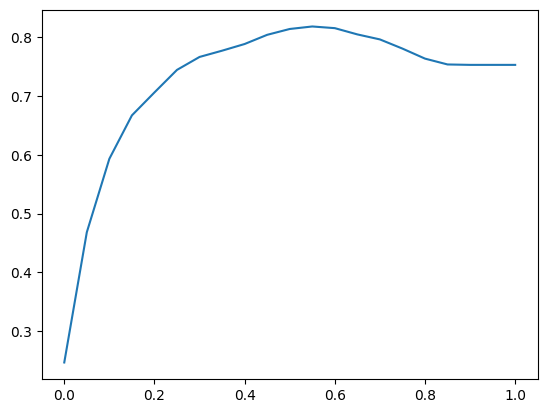

In [43]:
plt.plot(thresholds, scores)

In [44]:
from collections import Counter

In [45]:
# Check the number of churning and non-churning users in the test dataset
# Class imbalance has been detected. 
# This is where the distribution of classes in the training dataset is unequal
Counter(y_test)

Counter({0: 1061, 1: 348})

In [46]:
non_churning_percent = y_test.mean()
churning_percent = 1 - y_test.mean()
print('non_churning_percent:', non_churning_percent, 'churning_percent:',churning_percent) 

non_churning_percent: 0.24698367636621718 churning_percent: 0.7530163236337828


### Confusion Table

In [47]:
actual_positve = (y_test == 1)
actual_negative = (y_test == 0)

t= 0.55
predicted_positive = (y_pred >=t)
predicted_negative = (y_pred < t)

In [48]:
true_positive = (actual_positve & predicted_positive).sum()
true_negative = (actual_negative & predicted_negative).sum()

false_positive = (predicted_positive & actual_negative).sum()
false_negative = (predicted_negative & actual_positve).sum()

In [49]:
confusion_matrix = np.array([[true_negative, false_positive],[false_negative, true_positive]])

In [50]:
confusion_matrix

array([[973,  88],
       [168, 180]])

In [51]:
# Get the percentages
(confusion_matrix / confusion_matrix.sum()).round(2)


array([[0.69, 0.06],
       [0.12, 0.13]])

### Precision and Recal

#### Precision
- Fraction of positive predictions that are correct.
- A precision score of 67% means that *67%* of the positive predictions were actually correct and *33%* were incorrect.

In [52]:
precision = (true_positive/(true_positive + false_positive)).round(2)
precision

0.67

#### Recal 
- Fraction of correctly identified positive examples
- A recal of *52%* means that we correctly identified *52%* of user would churn for *48%* of customers we failed to predict that they would churn

In [53]:
recal = (true_positive / (true_positive + false_negative)).round(2)
recal

0.52

### Reciever Operating Characteristics (ROC) Curves

#### True Positve Rate
- True positive rate is the fraction of *True Positives* over the *total* number of *positive examples*.
- The goal is to get the *True Positve Rate* as **high** as possible.
- **True positive rate** is the same as **recal**


In [54]:
true_positive_rate = (true_positive/(true_positive + false_negative))
true_positive_rate

0.5172413793103449

#### False Positve Rate
- False positve rate is the fraction of *False Positives* over the *total* number of *negative examples*.
- The goal is to make the *False Negative Rate* as **low** as possible.

In [55]:
false_positive_rate = (false_positive/(false_positive + true_negative))
false_positive_rate

0.08294062205466542

In [56]:
from sklearn.metrics import roc_curve

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

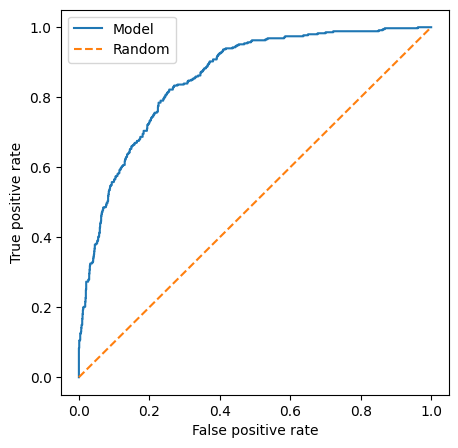

In [58]:
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')
# Labels and legend
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()


### Area Under ROC Curve (AUC)
- This is the probability that a randomly selected positive example has a higher score that a randomly selected negative example.
- The **higher** the value of *AUC* the better the model.

In [59]:
from sklearn.metrics import auc, roc_auc_score

In [60]:
auc(fpr, tpr)

0.8565886119145893

### Cross Validation

In [61]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=10000)
    model.fit(X_train, y_train)

    return dv, model 

In [62]:
def predict(dv, df, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [63]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm


c:\Users\CYPHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [64]:
n_split = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]):
    kfold = KFold(n_splits=n_split, shuffle=True, random_state=1)
   
    scores = []

    for train_index, validation_index in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_index]
        df_validation = df_train_full.iloc[validation_index]

        y_train = df_train.churn
        y_val = df_validation.churn

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(dv, df_validation, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
    print('C=%s %.3f +- %.3f'%(C, np.mean(scores), np.std(scores)))

 14%|█▍        | 1/7 [00:08<00:49,  8.27s/it]

C=0.001 0.825 +- 0.009


 29%|██▊       | 2/7 [00:26<01:11, 14.31s/it]

C=0.01 0.840 +- 0.008


 43%|████▎     | 3/7 [00:51<01:16, 19.09s/it]

C=0.1 0.842 +- 0.007


 57%|█████▋    | 4/7 [01:06<00:52, 17.34s/it]

C=0.5 0.842 +- 0.007


 71%|███████▏  | 5/7 [01:33<00:41, 20.75s/it]

C=1 0.842 +- 0.007


 86%|████████▌ | 6/7 [01:47<00:18, 18.69s/it]

C=1.5 0.842 +- 0.007


100%|██████████| 7/7 [02:03<00:00, 17.68s/it]

C=2 0.842 +- 0.007


## Final Model

In [65]:
dv, model = train(df_train_full, df_train_full.churn.values, C=1.0)
y_pred = predict(dv, df_test, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8583084164797903

## Save Model